# Import the main libiraries

In [ ]:
# Most important
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import os

# Load the DataSet

In [ ]:
## Read the Csv file
data = pd.read_csv("https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1")

In [ ]:
df_cars=data.copy()

# inspect the Data

In [ ]:
# Summary to all colums 
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df_cars)

,column,dtypes,nunique,sum_null
0,Brand,object,29,0
1,Model,object,1491,0
2,Year,int64,27,0
3,Selling_Price,int64,445,0
4,KM_Driven,int64,770,0
5,Fuel,object,5,0
6,Seller_Type,object,3,0
7,Transmission,object,2,0
8,Owner,object,5,0


In [ ]:
# Show the head of the dataFrame 
df_cars.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
## Some statistics on data 
df_cars.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
## check nulls of data 
df_cars.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- Their is no null values

In [ ]:
# Check the Duplicates in dataset
df_cars.duplicated().sum()

763

- Their is No duplicates in the data 

In [ ]:
df_cars.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# Drop the CarID column
df_cars.drop('Brand',axis=1,inplace=True)

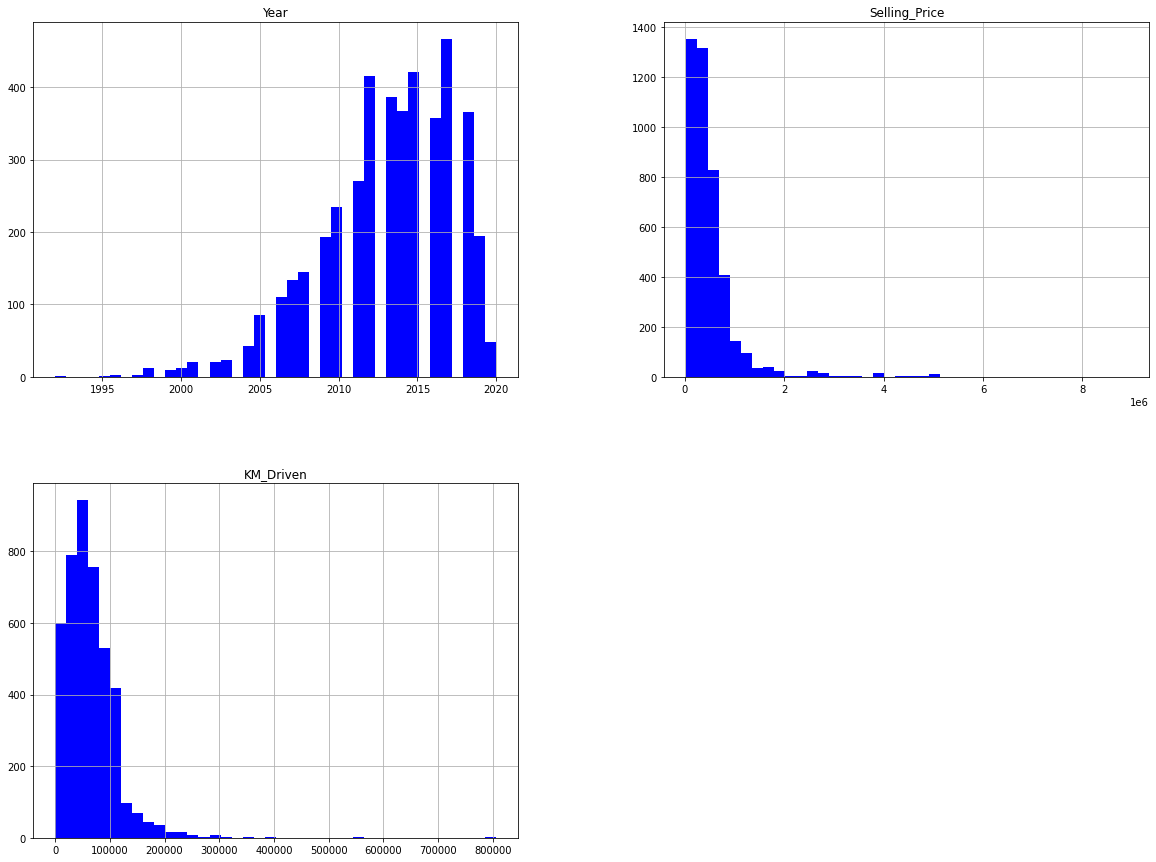

In [ ]:
# Histogram to all the nummeric columns
df_cars.hist(bins=40,figsize=(20,15),color='b');

In [ ]:
# Get the main names of cars
df_cars['Model'] = df_cars['Model'].str.split(' ',expand=True)[0]

In [ ]:
# Unique names of cars
df_cars.Model.unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [ ]:
# Select the categorical columns
categorical_cols=df_cars.select_dtypes(include=['object']).columns

In [ ]:
# print all the unique values of all categorical columns
for i in categorical_cols:
    print(i,'unique values')
    print('-----------------------------------')
    print(df_cars[i].unique())
    print('-----------------------------------------------------------------------------')

Model unique values
-----------------------------------
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
-----------------------------------------------------------------------------
Fuel unique values
-----------------------------------
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
-----------------------------------------------------------------------------
Seller_Type unique values
-----------------------------------
['Individual' 'Dealer' 'Trustmark Dealer']
-----------------------------------------------------------------------------
Transmission unique values
-----------------------------------
['Manual' 'Automatic']
-----------------------------------------------------------------------------
Owner unique values
-----------------------------------
['First Owner' 'Sec

- toyota is the maximum one 

In [ ]:
le = LabelEncoder()
df_cars['Model'] = le.fit_transform(df_cars['Model'])
df_cars['Fuel'] = le.fit_transform(df_cars['Fuel'])
df_cars['KM_Driven'] = le.fit_transform(df_cars['KM_Driven'])
df_cars['Seller_Type'] = le.fit_transform(df_cars['Seller_Type'])
df_cars['Transmission'] = le.fit_transform(df_cars['Transmission'])
df_cars['Year'] = le.fit_transform(df_cars['Year'])
df_cars['Owner'] = le.fit_transform(df_cars['Owner'])
df_cars['Selling_Price'] = le.fit_transform(df_cars['Selling_Price'])

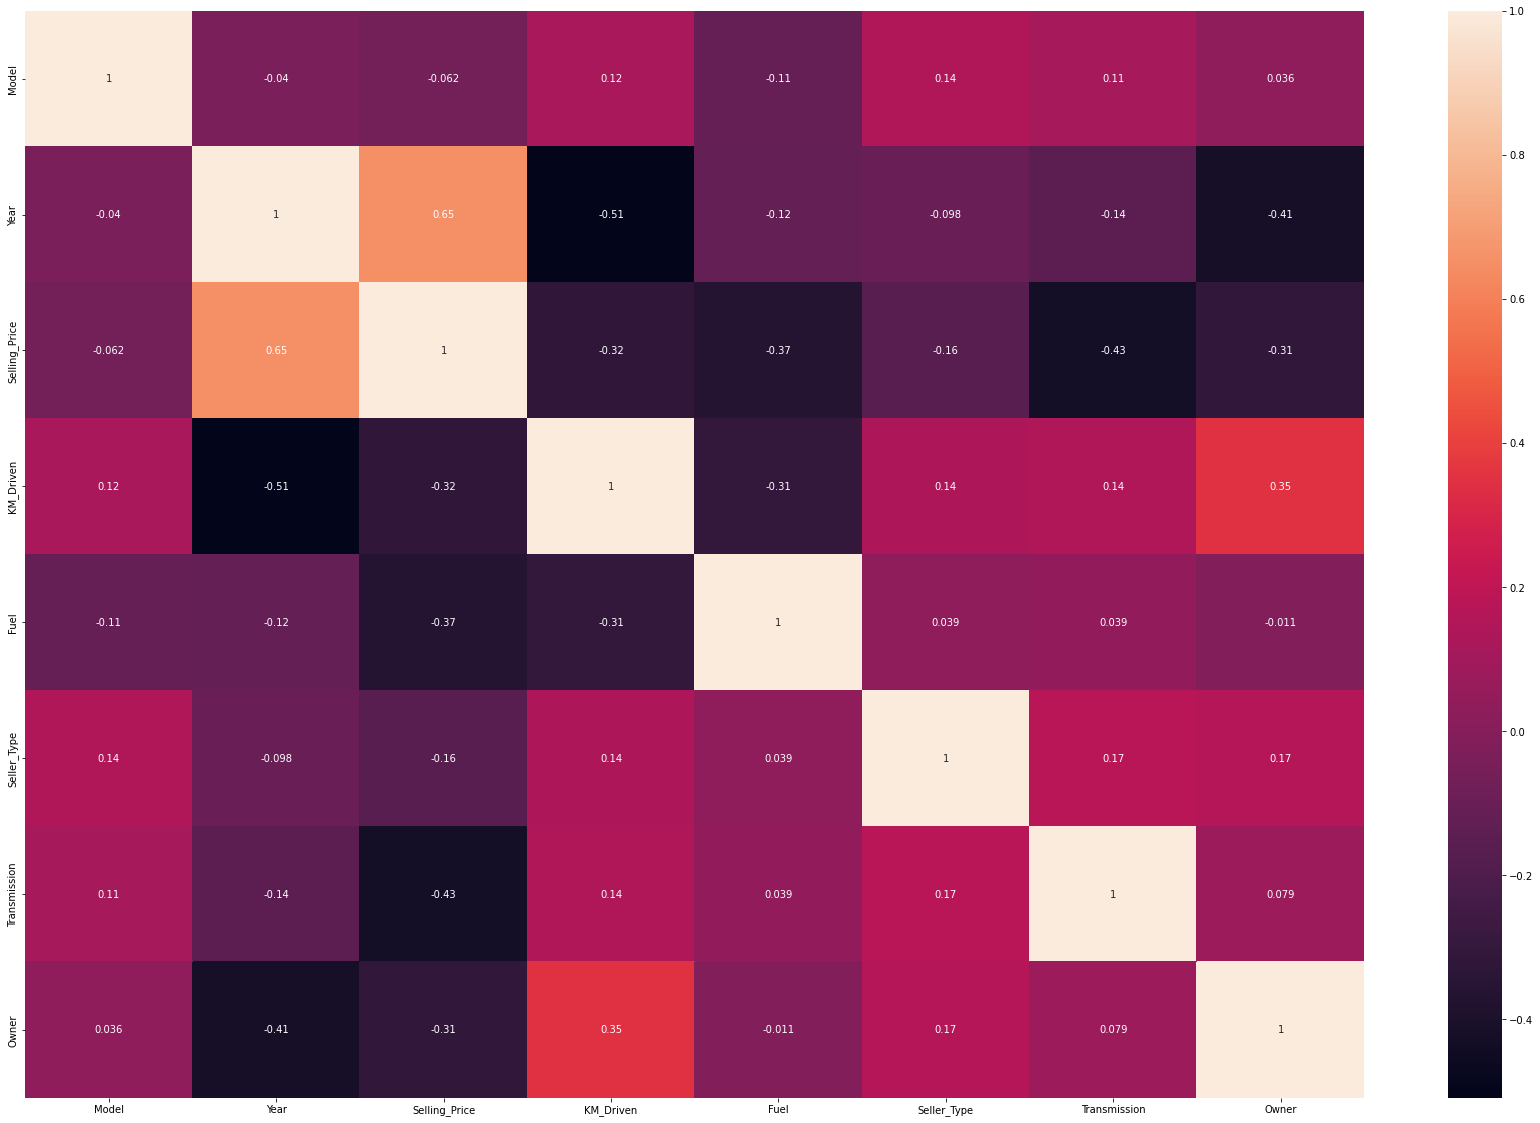

In [ ]:
plt.figure(figsize=(30,20))
c = df_cars.corr()
sns.heatmap(c,annot=True)

# Comment 
>  Price has high correlation with{wheelbase , carlength , carwidth , curbweight , enginesize , boreratio , horsepower , citympg , highwaympg , drivewheel , fuelsystem }

# Train Test Split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the data to x and y
# y is 1 column contain the values is the target
# x contain the values of the rest of columns
cars = df_cars[[ 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner']]
x = cars.drop('Selling_Price',axis=1).values
y = cars['Selling_Price'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state=42)

# Data scaling using robust regression

In [111]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear regression model

In [112]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [113]:
reg.score(x_train,y_train)

0.622122430179653

In [114]:
reg.score(x_test,y_test)

0.6126137478850038

In [115]:
reg.intercept_

206.5900510158655

In [116]:
reg.coef_

array([  -2.3437467 ,   59.1608624 ,  -19.21131772,  -65.96032362,
         -2.97812531, -107.97722432,   -6.65129755])

In [117]:
pd.DataFrame(reg.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
Model,-2.343747
Year,59.160862
Selling_Price,-19.211318
KM_Driven,-65.960324
Fuel,-2.978125
Seller_Type,-107.977224
Transmission,-6.651298


In [118]:
y_pred_1 = reg.predict(x_test)

In [119]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [120]:
df_1.head(10)

,y_test,Y_pred
0,75,168.089678
1,114,211.338065
2,52,94.560783
3,193,197.021881
4,275,337.789377
5,70,139.811252
6,216,183.291114
7,39,147.549215
8,129,237.784519
9,118,144.105024


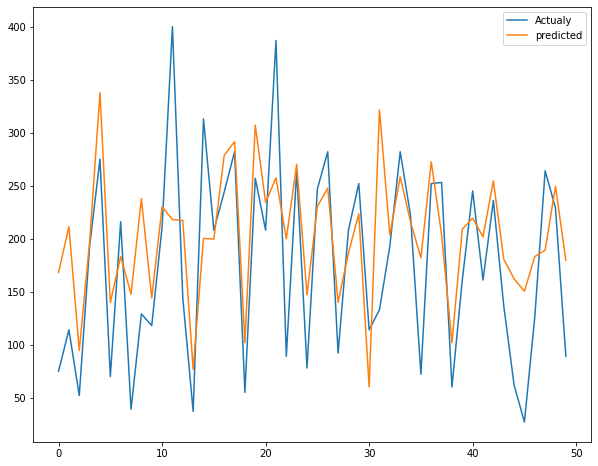

In [121]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);

# Ridge Model


In [122]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [123]:
rid.score(x_train,y_train)

0.622121391492549

In [124]:
rid.score(x_test,y_test)

0.612560603130902

In [125]:
rid.intercept_

206.58353735313273

In [126]:
rid.coef_

array([  -2.34875603,   59.16228955,  -19.19104823,  -65.88797435,
         -3.01719729, -107.65600476,   -6.66014643])

In [127]:
pd.DataFrame(rid.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
Model,-2.348756
Year,59.162290
Selling_Price,-19.191048
KM_Driven,-65.887974
Fuel,-3.017197
Seller_Type,-107.656005
Transmission,-6.660146


In [128]:
y_pred_2 = rid.predict(x_test)

In [129]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [130]:
df_2.head(10)

,y_test,Y_pred
0,75,168.085316
1,114,211.388468
2,52,94.613635
3,193,197.028654
4,275,337.454135
5,70,139.851444
6,216,183.384787
7,39,147.591884
8,129,237.761149
9,118,144.208119


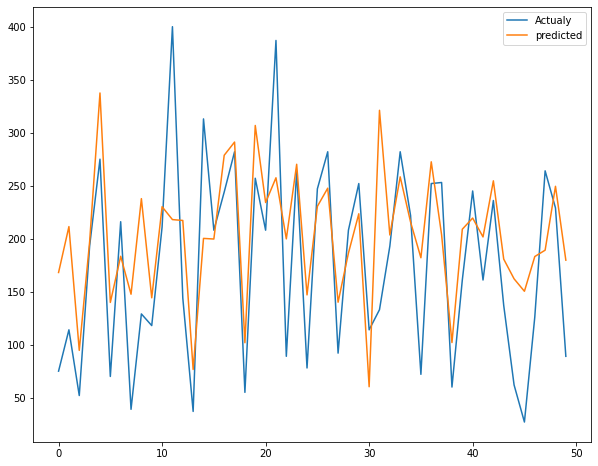

In [131]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actualy","predicted"]);

# Lasso Model

In [132]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.6)
lass.fit(x_train,y_train)

Lasso(alpha=0.6)

In [133]:
lass.score(x_train,y_train)

0.6213888516581206

In [134]:
lass.score(x_test,y_test)

0.6086848464868863

In [135]:
lass.intercept_

205.8896232132248

In [136]:
lass.coef_

array([  -1.79522301,   60.02163474,  -16.94591116,  -62.71794256,
         -1.47604048, -102.75784985,   -5.7268633 ])

In [137]:
pd.DataFrame(lass.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
Model,-1.795223
Year,60.021635
Selling_Price,-16.945911
KM_Driven,-62.717943
Fuel,-1.476040
Seller_Type,-102.757850
Transmission,-5.726863


In [138]:
y_pred_3 = lass.predict(x_test)

In [139]:
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_3})

In [140]:
df_3.head(10)

,y_test,Y_pred
0,75,168.248837
1,114,213.549200
2,52,95.872296
3,193,198.589854
4,275,333.155830
5,70,141.283656
6,216,181.923679
7,39,149.415330
8,129,237.464260
9,118,143.439906


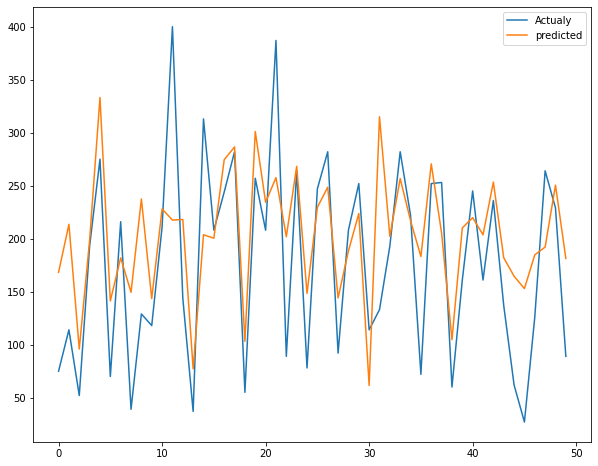

In [141]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actualy","predicted"]);

# Evaluating models


### Linear reg evaluation

In [165]:
#import r2_score 
from sklearn.metrics import r2_score

In [166]:
# calculate r2_score for the model
reg_score = r2_score(y_test,y_pred_1)

In [167]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.6117786065961819

In [168]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < reg_score

True

In [169]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [170]:
# calculate mean_squared_error
mse = mean_squared_error(y_test , y_pred_1)
mse

4045.487246948115

In [171]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

51.04383130177739

In [172]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

297186723493804.06

In [173]:
# calculate root_mean_squared_error
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

63.604144888113346

### Ridge Evaluation

In [174]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.612560603130902

In [175]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.6117253472706976

In [176]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [177]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

4046.0422393459803

In [178]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

51.05702765516066

In [179]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

297381923364605.8

In [180]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

63.604144888113346

### Lasso Evaluation

In [181]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [182]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.607841235130375

In [183]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [184]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

4086.5168922022344

In [185]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

51.50143359085177

In [186]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

297322718864852.2

In [187]:
# calculate root_mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(reg_mse)
lass_rmse

63.604144888113346

# Comapring The Three Models

In [188]:
models = ["Linear","Ridge","Lasso"]
data = [[reg_score,reg_mse],[rid_score,rid_mse],[lass_score,lass_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Linear,0.612614,4045.487247
Ridge,0.612561,4046.042239
Lasso,0.608685,4086.516892
